### Resolución Numérica de la Ecuación de Schrödinger Independiente del Tiempo

Proyecto de Mecánica Cuántica para Ingeniería - II Semestre - 2023

Por Julián Sánchez, Kaled Sequeira, Marian Gamboa, Javier Fernández, Roy David Moya

Se quiere resolver la ecuación:

$-\frac{\hbar}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi(x)=E\psi(x)  \Rightarrow \frac{d^2\psi}{dx^2}+k^2\psi(x)=0$

La misma es una ecuación diferencial, que describe la parte espacial, de la ecuación de Schrödinger en una dimensión; también es conocida como la ecuación de Schröndinger independiente del tiempo.  Las soluciones de esta ecuación, dependen de la forma del potencial V(x) en que se encuentre una partícula. Es posible separar la ecuación de Schröndinger, y resolver por separado la parte espacial de la misma, cuando el potencial V(x) no dependa del tiempo.

A continuación, se presenta la resolución de dicha ecuación diferencial, para un potencial que tenga una forma de pozo de potencial infinito, es decir, una partícula de masa "m", está limitada en su movimiento, por dos barreras de potencial infinito, una a cada lado, de modo que la partícula se puede desplazar horizontalmente en un pozo simétrico respecto al eje Y, en una dimensión. Como el potencial no depende del tiempo, se puede usar la parte espacial de la ecuación de Schrodinger.

=> Se empleará el método "shooting and matching" expuesto en el libro _Computational Physics_ por N. Giordano (2006)

El mismo consiste en dos etapas; la primera es transformar una ecuación diferencial ordinaria (EDO) con condiciones de frontera, a una ecuación EDO con condiciones iniciales. Para ello, se estima un valor de solución inicial, es decir, un valor de energía y un array en ceros, para la función de onda, y posteriormente, se procede a calcular los valores de la función de onda en la siguiente posición, usando la energía y los valores de la función en los dos valores de posición previos. De esta forma, se empieza a observar si la función calculada diverge, o bien, si se puede seguir sumando a la variable (energía) un delta, para luego volver a calcular el valor de la función de onda en las diferentes posiciones. Si los cambios en la variable (energía) son menores a una tolerancia dada ("tol" en el problema desarrollado), se considera que se resolvió el problema.

El método comentado, presenta un mejor resultado, para condiciones de frontera que son simétrico respecto al eje "Y", ya que se puede resolver la función para un lado del eje "Y", y reflejar el resultado al otro lado del eje. 

Detalladamente, dentro del proceso, se define un valor de energía inicial y un array que representa la función de onda evaluada en posiciones dadas por múltiplos de un delta X. Se procede a calcular el valor de la función de onda para la posición 2, a partir de la energía inicial y el valor de la función de onda en las posiciones 0 y 1; luego, se revisa que dicho valor no esté divergiendo (la función de onda es mayor al parámetro pCorte), ya que si diverge hay que ajustar si se restan o suman deltas de energía a la energía inicial, como se comenta más adelante. Si no diverge, se procede a calcular el valor de la función de la onda en la siguiente posición, usando los dos valores de la función de onda previos.

Si la ecuación de onda diverge, el valor de energía se ajusta en sentido contrario de como estaba; es decir, si se estaban sumando deltas de energía, se procede a modificar el delta a que sea el negativo de la mitad del delta de Energía que se estaba usando; o bien, si se estaban sumando deltas de energía negativos, se procede a asignar el delta, como el positivo de la mitad del delta de energía previo, de forma que la solución se vaya acercando a la función de onda y energía buscados.

In [2]:
# Se importan las librerías a emplear:

import numpy as np    #Librería de matemática, para facilitar el trabajo con datos, arrays y matrices, en python.
import matplotlib.pyplot as plt    #Librería para generación de gráficos, a partir de datos previamente almacenados.

### Definición de funciones:

In [9]:
def Ciclo_Principal_Pozo_Inf(N,deltaX,e_inicial,delta_e,direcDiv,pCorte,tol,psi):

    run = True # Condición de correr
    e_actual = e_inicial # Se inicializa la estimación actual
    delta_e_actual = delta_e # Se inicializa el step de la estimación
    last_diverge = direcDiv # Se inicializa la dirección de la divergencia

    # Se inicia el ciclo
    while run:
        # Se calcula la función de onda a partir de las anteriores (para la primera iteración será sobre 0)
        for i in range(1,N-1):
            psi[i+1] = 2*psi[i] - psi[i-1] - 2* deltaX**2 *psi[i] *(e_actual-V[i]) # Se calculan los psi siguientes

            # Se verifica que la función de onda no esté divergiendo
            if np.absolute(psi[i+1]) > pCorte:
                last_diverge = psi[i+1]
                print("Diverge: ", last_diverge)
                run = False # Si se haya divergencia se suspende el ciclo 
                break
            
            # Se evalua el delta E actual para ver si es aceptable o no
            if delta_e_actual < tol:
                run = False
                print("Converge, valor de E:", e_actual)
                print("Valor de psi: ", psi[i+1])
                break
            
            # Se modifica el valor de delta E si se cumple la condición dada
            if np.sign(last_diverge) != np.sign(psi[i+1]):
                delta_e_actual = -delta_e_actual/2

        # Se actualiza el valor de la energía
        e_actual +=delta_e_actual
    return psi
    

In [4]:
def Graf_psi_Pozo_Inf(x,psi):

    x_reversed = -1* x[::-1] # Dado que se obtuvo la solución para la parte positiva y el potencial es simétrico, se obtiene su parte negativa
    psi_reversed = psi[::-1] # Lo mismo para psi

    # Se concatenan los valores para formar la solución entera
    X = np.concatenate((x_reversed,x))
    PSI = np.concatenate((psi_reversed,psi))

    # Por último se realiza la gráfica 
    plt.plot(X,PSI,"m")
    plt.xlabel("Posición en x")
    plt.ylabel("Función de onda $\psi (x)$")
    plt.show()

### Definición de parámetros:

In [5]:
# Se definen los parámetros generales del sistema:

deltaX = 0.01 # El step en x
e_inicial = 0 # La estimación inicial de la energía
delta_e = 0.01 # El step en la energía
pCorte = 2 # El parámetro de corte
direcDiv = 1 # La dirección de divergencia de la función de onda (variable)

# Se establecen los parámetros del caso particular de estudio:

L = 1 # El tamaño del pozo de potencial infinito
x=np.arange(0,L+deltaX,deltaX) # El array (arreglo) con los valores de x, entre 0 y L+deltaX, con un step de deltaX
N = np.size(x) # El largo de x

# Se crea la función de onda y sus valores iniciales

psi = np.zeros(N) # La función de onda con 0 como valores para cada psi(x)

# Se definen los valores iniciales de la función de onda
psi[0] = 1
psi[1] = 1

In [6]:
# Se define una función potencial:

V = np.zeros(N) # El potencial de un pozo infinito será 0 en la extensión de x, entre los límites de tamaño del pozo.

### Ejecución de funciones:

In [7]:
psi_result = Ciclo_Principal_Pozo_Inf(N,deltaX,e_inicial,delta_e,direcDiv,pCorte,0.0001,psi)


Converge, valor de E: 1.245000000000001
Valor de psi:  0.999751


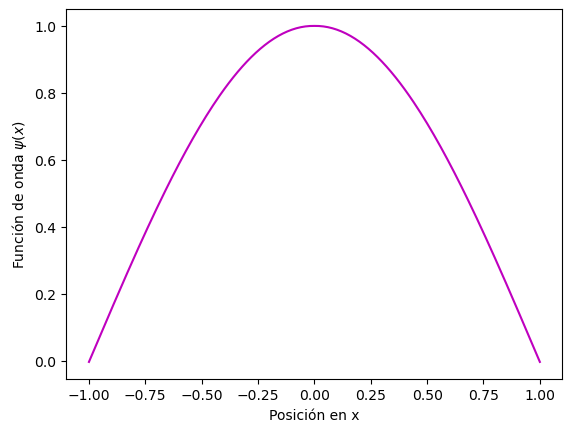

In [8]:
Graf_psi_Pozo_Inf(x,psi)